In [1]:
import codecs
from bs4 import BeautifulSoup
from konlpy.tag import Twitter
import numpy as np

In [2]:
def text2seq(text,pos="Noun"):
    malist = twitter.pos(text)
    res_list = []
    for word in malist:
        if word[1] == pos:
            res_list.append(word[0])
    return res_list

In [3]:
# 소비자상담데이터 읽어오기    
fp = codecs.open("yang.txt", "r")
lines = fp.readlines()
twitter = Twitter()
word_dic = {}
fp.close() 

D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [4]:
# 명사,부사,형용사,동사만 골라내고 나머지는 버린다. 
for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] in ["Noun" , "Adjective" , "Verb" , 'Adverb']:
            if not (word[0] in word_dic):
                word_dic[word[0]] = 0
            word_dic[word[0]] += 1

In [5]:
# 사전 만들기(빈도수 순으로)
keys = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
for word, count in keys[:10000]:
    print("{0}({1}) ".format(word, count), end="")

배송(99) 배달(36) 주문(33) 변경(31) 되나요(22) 가방(21) 오늘(20) 주(17) 해서(16) 했는데(15) 요(15) 신청(15) 취소(15) 우유(14) 하루(14) 해주세요(13) 제(13) 개(13) 도시락(13) 두유(12) 언제(12) 문의(12) 좀(11) 수(11) 다이어트(11) 혹시(10) 상품(10) 부탁드립니다(9) 어떻게(9) 건가(9) 분유(9) 싶습니다(9) 가요(9) 식품(9) 시작(9) 시(9) 제품(9) 받아(9) 확인(8) 주소(8) 먹어도(8) 메뉴(8) 내일(7) 시간(7) 알(7) 있나요(7) 월(7) 때(7) 번(7) 합니다(7) 배송지(7) 개월(7) 가능한가요(7) 날짜(7) 안(7) 하는데(6) 아기(6) 세트(6) 구입(6) 회사(6) 추가(6) 프로그램(6) 구매(6) 된(6) 같이(6) 날(6) 너무(6) 드립니다(6) 잘(6) 그럼(6) 다(6) 하면(6) 왜(5) 꼭(5) 거(5) 택배(5) 것(5) 미(5) 가능할까(5) 앞(5) 를(5) 정기(5) 할(5) 결제(5) 커피(5) 현관(5) 더(5) 했습니다(5) 그냥(5) 되는건(5) 이번(5) 한번(5) 처음(5) 월요일(5) 일(5) 건지(4) 오는(4) 없이(4) 왔는데(4) 집(4) 총(4) 같은(4) 안녕하세요(4) 하려면(4) 쇼핑몰(4) 하나요(4) 체험(4) 요청(4) 뒤(4) 때문(4) 보(4) 다음(4) 부터(4) 초기(4) 해(4) 도착(4) 종료(4) 식단(4) 는걸(4) 지방(4) 있을까요(4) 두부(4) 출근(3) 이후(3) 사람(3) 이전(3) 이벤트(3) 어디(3) 지역(3) 안되나요(3) 부탁드려요(3) 왔습니다(3) 기존(3) 왔어요(3) 어제(3) 무료(3) 샘플(3) 받고(3) 지금(3) 받게(3) 이미(3) 해야(3) 된건(3) 진행(3) 중(3) 문자(3) 홈페이지(3) 없나요(3) 공휴일(3) 방금(3) 했는데요(3) 입니다(3) 만(3) 설탕(3) 환불(3) 감량(3) 아래(3) 받는(3) 매

In [6]:
# word-index사전을 만든다. 
from keras.preprocessing.text import *
from keras.preprocessing.sequence import skipgrams

wordId_dic = {}
idx = 0
for key in keys:
    idx += 1
    print(idx , key)
    wordId_dic[key[0]] = idx

Using TensorFlow backend.


1 ('배송', 99)
2 ('배달', 36)
3 ('주문', 33)
4 ('변경', 31)
5 ('되나요', 22)
6 ('가방', 21)
7 ('오늘', 20)
8 ('주', 17)
9 ('해서', 16)
10 ('했는데', 15)
11 ('요', 15)
12 ('신청', 15)
13 ('취소', 15)
14 ('우유', 14)
15 ('하루', 14)
16 ('해주세요', 13)
17 ('제', 13)
18 ('개', 13)
19 ('도시락', 13)
20 ('두유', 12)
21 ('언제', 12)
22 ('문의', 12)
23 ('좀', 11)
24 ('수', 11)
25 ('다이어트', 11)
26 ('혹시', 10)
27 ('상품', 10)
28 ('부탁드립니다', 9)
29 ('어떻게', 9)
30 ('건가', 9)
31 ('분유', 9)
32 ('싶습니다', 9)
33 ('가요', 9)
34 ('식품', 9)
35 ('시작', 9)
36 ('시', 9)
37 ('제품', 9)
38 ('받아', 9)
39 ('확인', 8)
40 ('주소', 8)
41 ('먹어도', 8)
42 ('메뉴', 8)
43 ('내일', 7)
44 ('시간', 7)
45 ('알', 7)
46 ('있나요', 7)
47 ('월', 7)
48 ('때', 7)
49 ('번', 7)
50 ('합니다', 7)
51 ('배송지', 7)
52 ('개월', 7)
53 ('가능한가요', 7)
54 ('날짜', 7)
55 ('안', 7)
56 ('하는데', 6)
57 ('아기', 6)
58 ('세트', 6)
59 ('구입', 6)
60 ('회사', 6)
61 ('추가', 6)
62 ('프로그램', 6)
63 ('구매', 6)
64 ('된', 6)
65 ('같이', 6)
66 ('날', 6)
67 ('너무', 6)
68 ('드립니다', 6)
69 ('잘', 6)
70 ('그럼', 6)
71 ('다', 6)
72 ('하면', 6)
73 ('왜', 5)
74 ('꼭', 5)
75 ('거', 5)


In [7]:
all_sen = []

# 모든 문장을 index로 바꾼다. 
for text in lines[0:300]:
    sen_idx = [wordId_dic[w] for w in text2seq(text)]
    all_sen.append(sen_idx)
all_sen_arr = np.array(all_sen)

X_train_all = all_sen_arr

In [8]:
# 분류한 정답파일을 만들어 읽어온다. 
fp2 = codecs.open("yang_class.txt", "r")
classes = fp2.readlines()
cls26 = []
class_dic = {}
idx = 0

for cls in classes:
    cls = cls.replace('\n','')
    cls26.append(cls)
    
    if not (cls in class_dic):
        class_dic[cls] = idx
        idx += 1
        
fp2.close()

In [9]:
cls_idxes = []
index = 0 

# Y_train구하기 
for text in cls26:
    idx = class_dic[text]
    index += 1
    print(index , text , idx)
    cls_idxes.append(idx) 
    
cls_idxes_arr = np.array(cls_idxes)
Y_train_all = cls_idxes_arr

1 미배송 0
2 배송일정 1
3 미배송 0
4 배송장소 2
5 미배송 0
6 배송일정 1
7 배송방법 3
8 주문 4
9 배송방법 3
10 배송방법 3
11 배송중단 5
12 구매문의 6
13 미배송 0
14 배송연기 7
15 배송오류 8
16 배송일정 1
17 가방 9
18 배송장소 2
19 미배송 0
20 미배송 0
21 배송변경 10
22 가방 9
23 배송일정 1
24 결제오류 11
25 결제오류 11
26 상품문의 12
27 인사 13
28 배송일정 1
29 배송신청 14
30 배송일정 1
31 배송장소 2
32 상품변경 15
33 배송장소 2
34 상품문의 12
35 상품문의 12
36 상품변경 15
37 배송문의 16
38 미배송 0
39 미배송 0
40 교환환불 17
41 이벤트 18
42 시스템 19
43 상품문의 12
44 상품문의 12
45 상품문의 12
46 가방 9
47 이벤트 18
48 가방 9
49 배송일정 1
50 배송일정 1
51 배송상품 20
52 배송일정 1
53 상품불량 21
54 배송문의 16
55 배송일정 1
56 배송오류 8
57 배송일정 1
58 배송일정 1
59 가방 9
60 교환환불 17
61 주문변경 22
62 상품문의 12
63 배송장소 2
64 배송일정 1
65 배송장소 2
66 배송방법 3
67 취소해지 23
68 취소해지 23
69 배송장소 2
70 배송장소 2
71 교환환불 17
72 상품문의 12
73 배송일정 1
74 배송일정 1
75 상품문의 12
76 상품불량 21
77 상품문의 12
78 배송오류 8
79 배송오류 8
80 배송일정 1
81 주문변경 22
82 가방 9
83 주문 4
84 가방 9
85 미배송 0
86 미배송 0
87 상품문의 12
88 배송일정 1
89 가방 9
90 이벤트 18
91 배송오류 8
92 이벤트 18
93 배송일정 1
94 취소해지 23
95 배송일정 1
96 가방 9
97 가방 9
98 배송상품 20
99 상품불량 21
100 배송일정 1
101 배송상품 20

In [10]:
# 훈련 

# LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding , Dropout, Activation
from keras.preprocessing import sequence
from keras.utils import np_utils

from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
category = np.max(Y_train_all) + 1

X_train = X_train_all
X_test = X_train_all
Y_train = Y_train_all
Y_test = Y_train_all

# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [11]:
# 모델의 설정
model = Sequential()
model.add(Embedding(971, 200))
model.add(Dropout(0.62))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(26, activation='softmax'))

# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, 
                    batch_size=100, 
                    epochs=200, 
                    validation_data=(x_test, y_test))


D:\Users\Yohan\anaconda3\envs\tensorflow_lab\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 200 samples, validate on 200 samples
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 3.2406 - accuracy: 0.1250 - val_loss: 3.2082 - val_accuracy: 0.2400
Epoch 2/200
200/200 [==============================] - 0s 846us/step - loss: 3.1683 - accuracy: 0.2400 - val_loss: 3.1411 - val_accuracy: 0.2400
Epoch 3/200
200/200 [==============================] - 0s 843us/step - loss: 3.0781 - accuracy: 0.2400 - val_loss: 3.0442 - val_accuracy: 0.2400
Epoch 4/200
200/200 [==============================] - 0s 823us/step - loss: 2.9751 - accuracy: 0.2400 - val_loss: 2.9299 - val_accuracy: 0.2400
Epoch 5/200
200/200 [==============================] - 0s 821us/step - loss: 2.8781 - accuracy: 0.2400 - val_loss: 2.8455 - val_accuracy: 0.2400
Epoch 6/200
200/200 [==============================] - 0s 818us/step - loss: 2.8317 - accuracy: 0.2400 - val_loss: 2.8046 - val_accuracy: 0.2400
Epoch 7/200
200/200 [==============================] - 0s 818us/step - loss: 2.8015 - 

Epoch 57/200
200/200 [==============================] - 0s 808us/step - loss: 1.2374 - accuracy: 0.7100 - val_loss: 1.1740 - val_accuracy: 0.7150
Epoch 58/200
200/200 [==============================] - 0s 811us/step - loss: 1.2157 - accuracy: 0.6950 - val_loss: 1.1292 - val_accuracy: 0.7250
Epoch 59/200
200/200 [==============================] - 0s 890us/step - loss: 1.1579 - accuracy: 0.7150 - val_loss: 1.0900 - val_accuracy: 0.7400
Epoch 60/200
200/200 [==============================] - ETA: 0s - loss: 1.0610 - accuracy: 0.79 - 0s 875us/step - loss: 1.1074 - accuracy: 0.7500 - val_loss: 1.0503 - val_accuracy: 0.7600
Epoch 61/200
200/200 [==============================] - 0s 870us/step - loss: 1.0724 - accuracy: 0.7500 - val_loss: 1.0090 - val_accuracy: 0.7650
Epoch 62/200
200/200 [==============================] - 0s 836us/step - loss: 1.0207 - accuracy: 0.7550 - val_loss: 0.9754 - val_accuracy: 0.7800
Epoch 63/200
200/200 [==============================] - 0s 861us/step - loss: 0.99

200/200 [==============================] - 0s 962us/step - loss: 0.2114 - accuracy: 0.9600 - val_loss: 0.1830 - val_accuracy: 0.9700
Epoch 113/200
200/200 [==============================] - 0s 898us/step - loss: 0.2130 - accuracy: 0.9600 - val_loss: 0.1788 - val_accuracy: 0.9750
Epoch 114/200
200/200 [==============================] - 0s 868us/step - loss: 0.2009 - accuracy: 0.9650 - val_loss: 0.1740 - val_accuracy: 0.9800
Epoch 115/200
200/200 [==============================] - 0s 848us/step - loss: 0.1928 - accuracy: 0.9650 - val_loss: 0.1686 - val_accuracy: 0.9800
Epoch 116/200
200/200 [==============================] - 0s 875us/step - loss: 0.1915 - accuracy: 0.9700 - val_loss: 0.1633 - val_accuracy: 0.9800
Epoch 117/200
200/200 [==============================] - 0s 843us/step - loss: 0.1922 - accuracy: 0.9700 - val_loss: 0.1598 - val_accuracy: 0.9750
Epoch 118/200
200/200 [==============================] - 0s 875us/step - loss: 0.1829 - accuracy: 0.9750 - val_loss: 0.1587 - val_ac

200/200 [==============================] - 0s 836us/step - loss: 0.0683 - accuracy: 0.9950 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 168/200
200/200 [==============================] - 0s 913us/step - loss: 0.0647 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 169/200
200/200 [==============================] - 0s 828us/step - loss: 0.0633 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 170/200
200/200 [==============================] - 0s 848us/step - loss: 0.0617 - accuracy: 0.9950 - val_loss: 0.0495 - val_accuracy: 1.0000
Epoch 171/200
200/200 [==============================] - 0s 813us/step - loss: 0.0656 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 172/200
200/200 [==============================] - 0s 848us/step - loss: 0.0610 - accuracy: 1.0000 - val_loss: 0.0481 - val_accuracy: 1.0000
Epoch 173/200
200/200 [==============================] - 0s 828us/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 0.0475 - val_ac

200/200 [==============================] - 0s 203us/step

 Test Accuracy: 1.0000


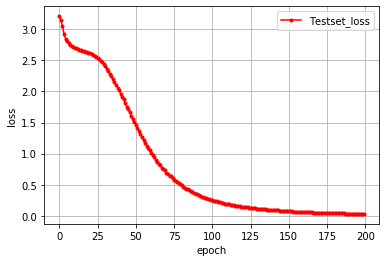

In [12]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 그래프로 표현
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()